<a href="https://colab.research.google.com/github/nafiul-araf/Pandas-Projects/blob/main/Pandas_Project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(
    context='talk',
    style='whitegrid',
    palette='deep',
    font='sans-serif',
    rc={'figure.figsize': (10, 6), 'axes.grid': True},
)

In [22]:
df=pd.read_csv('/content/drive/MyDrive/DS360 Machine Learning/Course DSML/amazon.csv', encoding='iso-8859-1')

In [23]:
# 1. Display Top 5 Rows of The Dataset

df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [24]:
# 2. Check Last 5 Rows

df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [25]:
# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

df.shape

(6454, 5)

In [26]:
# 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [27]:
# 5. Check For Duplicate Data and Drop Them

df.duplicated().sum()

32

In [28]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [29]:
# 6. Check Null Values In The Dataset

df.isnull().sum()

,0
year,0
state,0
month,0
number,0
date,0


In [30]:
# 7. Get Overall Statistics About The Dataframe

df.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [31]:
df['date']=pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6422 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6422 non-null   int64         
 1   state   6422 non-null   object        
 2   month   6422 non-null   object        
 3   number  6422 non-null   float64       
 4   date    6422 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 301.0+ KB


In [32]:
df.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


In [33]:
# 8. Rename Month Names To English

df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [34]:
month_translation={
    'Janeiro': 'January',
    'Fevereiro': 'February',
    'Março': 'March',
    'Abril': 'April',
    'Maio': 'May',
    'Junho': 'June',
    'Julho': 'July',
    'Agosto': 'August',
    'Setembro': 'September',
    'Outubro': 'October',
    'Novembro': 'November',
    'Dezembro': 'December'
}


df['month']=df['month'].map(month_translation)
df['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [35]:
# 9. Total Number of Fires Registered

df.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [36]:
df['number'].sum()

698811.073

In [37]:
# 10. In Which Month Maximum Number of Forest Fires Were Reported?

df.groupby('month')['number'].sum().sort_values(ascending=False).head(1)

,number
month,
July,92319.113


In [38]:
# 11. In Which Year Maximum Number of Forest Fires Was Reported?

df.groupby('year')['number'].sum().sort_values(ascending=False).head(1)

,number
year,
2003,42760.674


In [40]:
# 12. In Which State Maximum Number of Forest Fires Was Reported?

np.round(df.groupby('year')['number'].sum().sort_values(ascending=False).head(1), 2)

,number
year,
2003,42760.67


In [41]:
# 13. Find Total Number of Fires Were Reported In Amazonas

df.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [42]:
df.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [44]:
df[df['state'] == 'Amazonas']['number'].sum()

30650.129

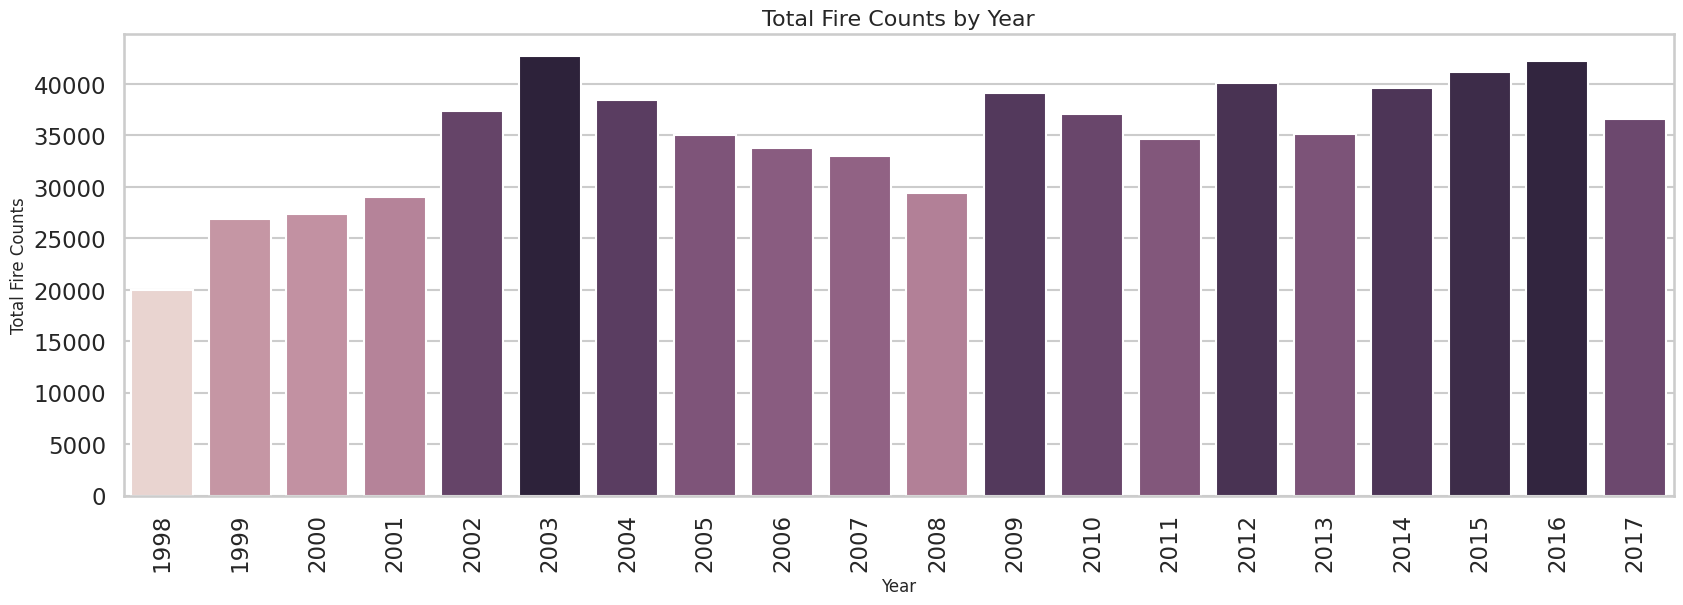

In [48]:
# 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)


yearly_fire_counts=df.groupby('year')['number'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(20, 6))
sns.barplot(x='year', y='number', data=yearly_fire_counts, hue='number', legend=False)
plt.title('Total Fire Counts by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Fire Counts', fontsize=12)
plt.xticks(rotation=90)
plt.show()

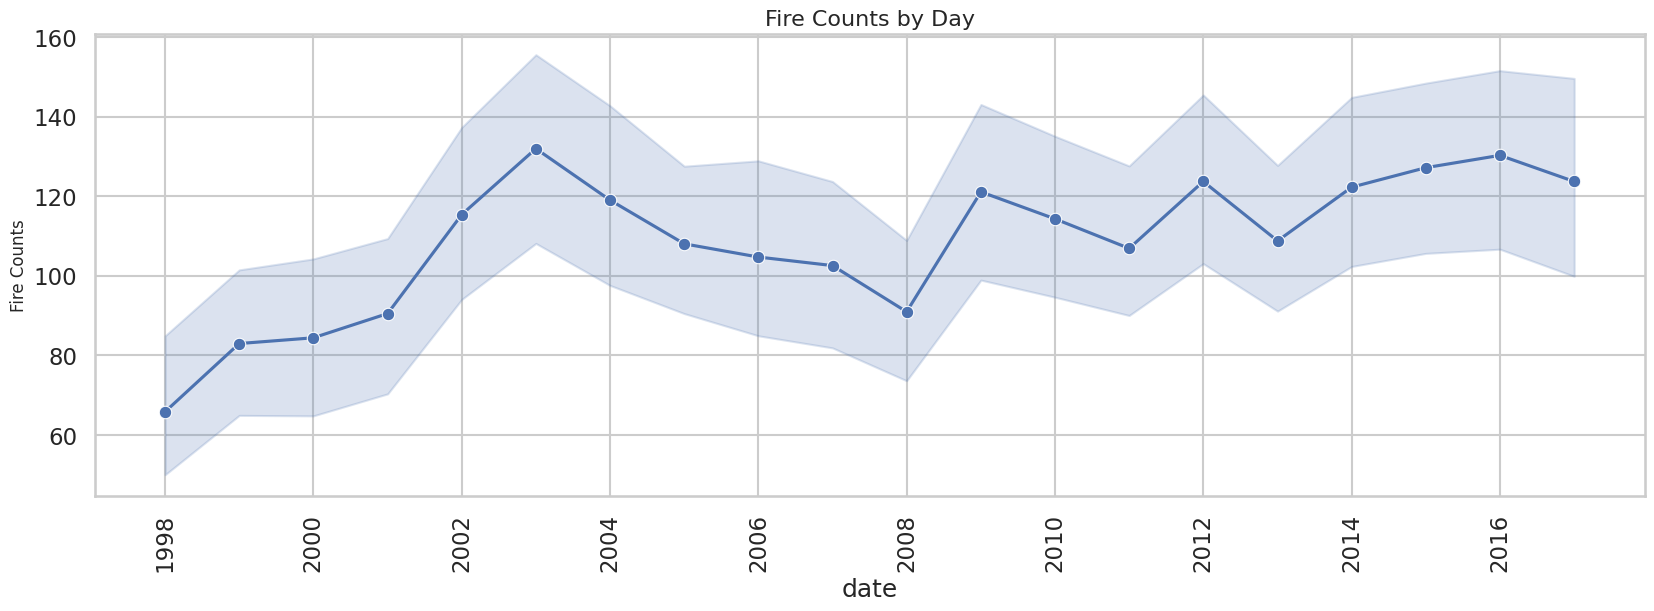

In [49]:
# 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)


plt.figure(figsize=(20, 6))
sns.lineplot(x='date', y='number', data=df, marker='o', color='b')
plt.title('Fire Counts by Day', fontsize=16)
plt.ylabel('Fire Counts', fontsize=12)
plt.xticks(rotation=90)
plt.show()

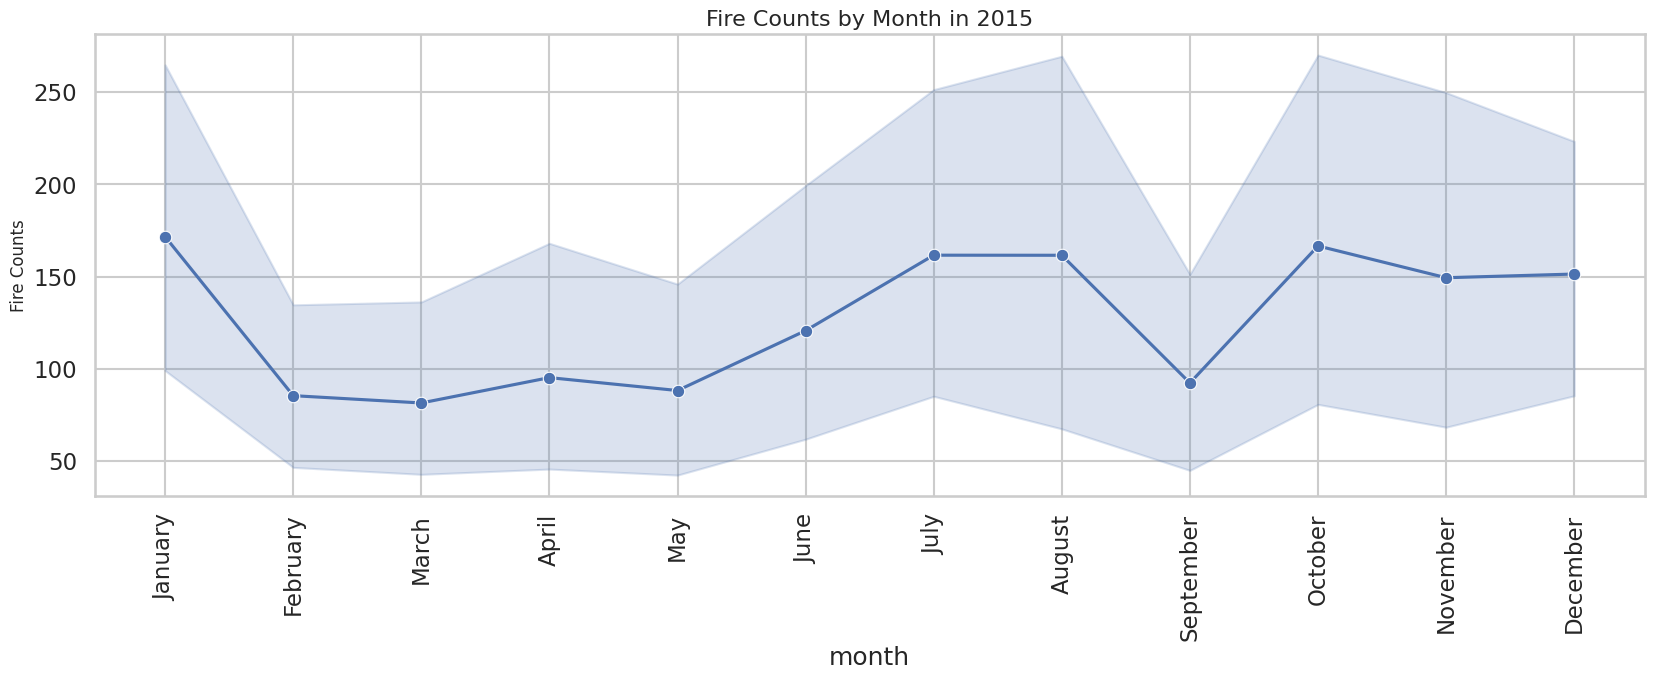

In [50]:
# 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

fire_2015=df[df['year'] == 2015]

plt.figure(figsize=(20, 6))
sns.lineplot(x='month', y='number', data=fire_2015, marker='o', color='b')
plt.title('Fire Counts by Month in 2015', fontsize=16)
plt.ylabel('Fire Counts', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [51]:
# 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)


np.round(df.groupby('state')['number'].mean().sort_values(ascending=False), 2)

,number
state,
Sao Paulo,213.90
Mato Grosso,203.48
Bahia,187.22
Piau,158.17
Goias,157.72
Minas Gerais,156.80
Tocantins,141.04
Amazonas,128.24
Ceara,127.31


In [52]:
# 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

december_fires=df[df['month'] == 'December']

state_names=december_fires.state.unique()

print(state_names)

['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']
